# Decision Trees
University of Denver 
Makarand Nadendla

In [145]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, zero_one_loss, classification_report, confusion_matrix, plot_confusion_matrix, recall_score, precision_score, f1_score, plot_roc_curve

In [146]:
voter_csv = pd.read_csv("BlueOrRed.csv")

Let's take a look at missing values and see if they need preprocessing.

In [147]:
voter_csv.isna().sum()

Age              0
HomeOwner        0
Female           0
Married          0
HouseholdSize    0
Income           0
Education        0
Church           0
Undecided        0
dtype: int64

As well as the relative distribution of values

In [148]:
voter_csv.head()

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,51,1,1,1,4,171.0,15,0,1
1,46,1,1,1,6,420.0,15,1,0
2,55,1,0,1,6,132.0,16,0,1
3,50,1,0,1,4,18.0,8,0,0
4,49,1,1,1,2,66.0,15,1,1


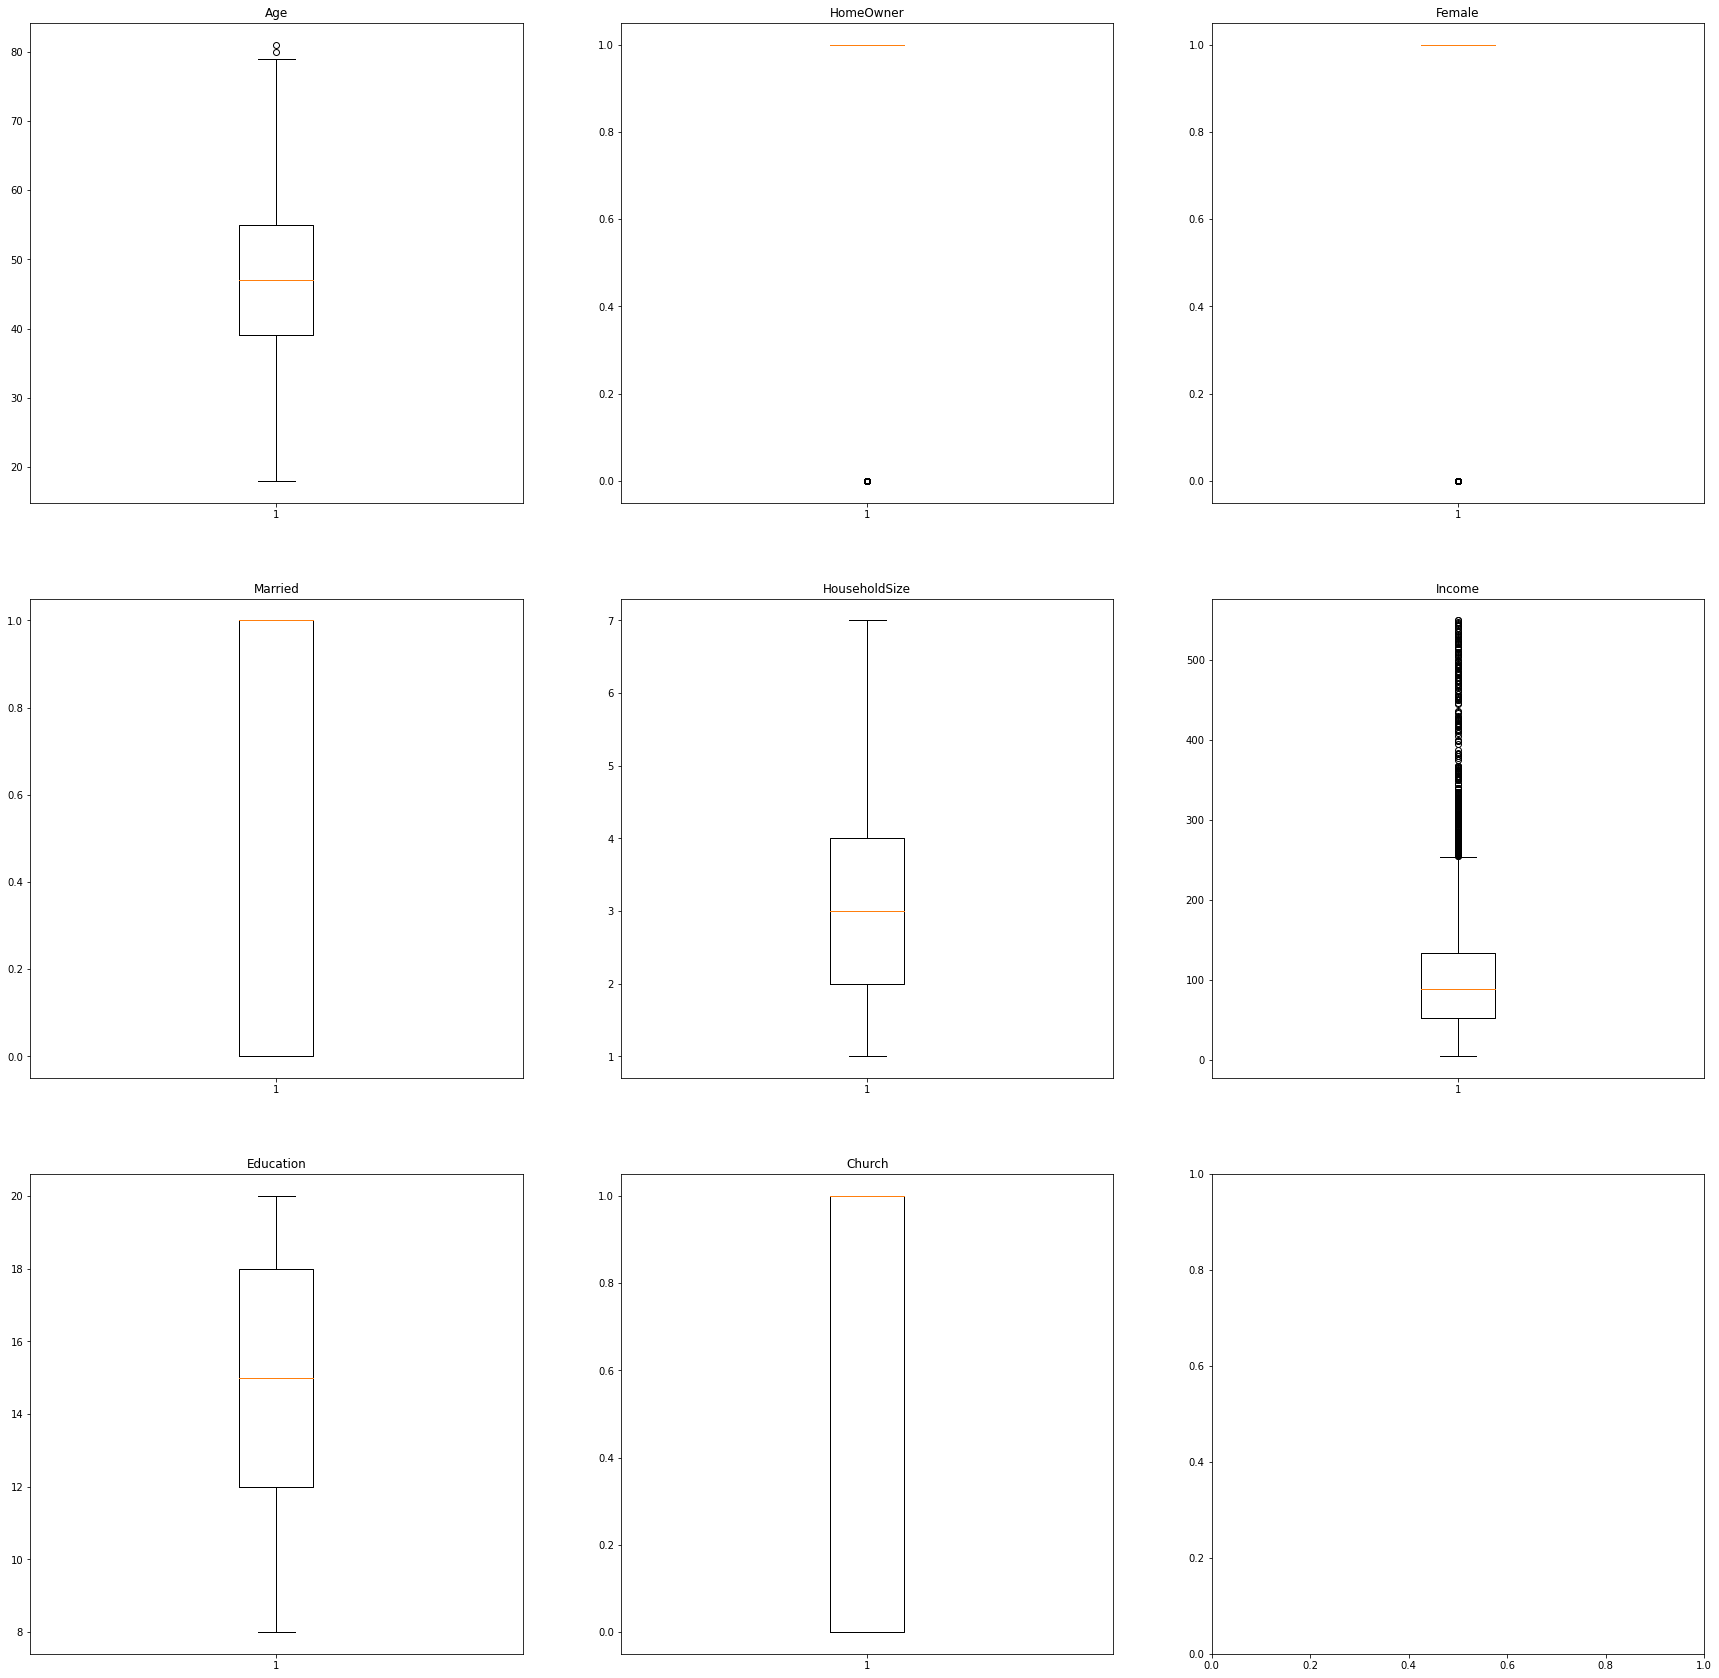

In [149]:
fig, ax = plt.subplots(3,3, figsize = (30, 30))
i = 0
for name, val in voter_csv.items():
    if name != "Undecided":
        ax[i//3][i%3].boxplot(val)
        ax[i//3][i%3].set_title(name)
        i+=1
plt.show()

In [150]:
for name, val in voter_csv.items():
    print(name)
    print(val)

Age
0       51
1       46
2       55
3       50
4       49
        ..
9995    55
9996    29
9997    59
9998    66
9999    55
Name: Age, Length: 10000, dtype: int64
HomeOwner
0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    0
9998    0
9999    1
Name: HomeOwner, Length: 10000, dtype: int64
Female
0       1
1       1
2       0
3       0
4       1
       ..
9995    1
9996    1
9997    1
9998    0
9999    1
Name: Female, Length: 10000, dtype: int64
Married
0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    1
Name: Married, Length: 10000, dtype: int64
HouseholdSize
0       4
1       6
2       6
3       4
4       2
       ..
9995    2
9996    5
9997    1
9998    3
9999    4
Name: HouseholdSize, Length: 10000, dtype: int64
Income
0       171.0
1       420.0
2       132.0
3        18.0
4        66.0
        ...  
9995     37.0
9996    100.0
9997     35.0
9998      4.0
9999     19.0
Name: Income, Len

Here, we'll scale the values appropriately.

In [151]:
from sklearn.preprocessing import MinMaxScaler

In [152]:
scaler = MinMaxScaler()
continuous_vars = ["Age", "Education", "HouseholdSize", "Income"]
voter_csv[["Age", "Education", "HouseholdSize", "Income"]] = scaler.fit_transform(voter_csv[["Age", "Education", "HouseholdSize", "Income"]])

In [153]:
voter_csv.head()

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,0.523810,1,1,1,0.500000,0.306422,0.583333,0,1
1,0.444444,1,1,1,0.833333,0.763303,0.583333,1,0
2,0.587302,1,0,1,0.833333,0.234862,0.666667,0,1
3,0.507937,1,0,1,0.500000,0.025688,0.000000,0,0
4,0.492063,1,1,1,0.166667,0.113761,0.583333,1,1


Let's split the data into our training and test splits.

In [154]:
X = voter_csv.drop(axis = 1, columns = "Undecided")
y = voter_csv["Undecided"]
X_train, X_test, y_train, y_test_data = train_test_split(X, y, test_size = 0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test_data.shape)

(7000, 8) (3000, 8) (7000,) (3000,)


In [155]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [156]:
y_train_pred[:100]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [157]:
y_test_pred[:100]

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [158]:
accuracy_score(y_train_pred, y_train)

1.0

In [159]:
accuracy_score(y_test_pred,y_test_data)

0.9683333333333334

In [160]:
clf.score(X_train, y_train)

1.0

In [161]:
clf.score(X_test, y_test_data)

0.9683333333333334

In [18]:
zero_one_loss(y_test_data, y_test_pred)

0.03300000000000003

In [19]:
zero_one_loss(y_train, y_train_pred)

0.0

In [20]:
print(classification_report(y_test_data, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1773
           1       0.96      0.96      0.96      1227

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



In [21]:
confusion_matrix(y_test_data, y_test_pred)

array([[1718,   55],
       [  44, 1183]], dtype=int64)

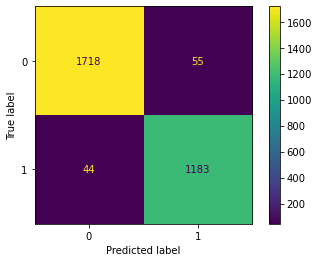

In [22]:
plot_confusion_matrix(clf, X_test, y_test_data)

In [23]:
recall_score(y_test_data, y_test_pred)

0.9641401792991035

In [24]:
precision_score(y_test_data, y_test_pred)

0.9555735056542811

In [25]:
f1_score(y_test_data, y_test_pred)

0.9598377281947262

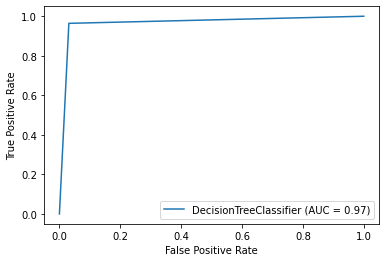

In [26]:
plot_roc_curve(clf, X_test, y_test_data)

In [31]:
clf.tree_.max_depth

17

In [37]:
error_rates = []
for i in range(1,clf.tree_.max_depth+1):
    clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(X_train, y_train)
    y_depth_pred = clf.predict(X_test)
    error_rates.append(1 - accuracy_score(y_depth_pred,y_test_data))
np.argmin(error_rates)

5

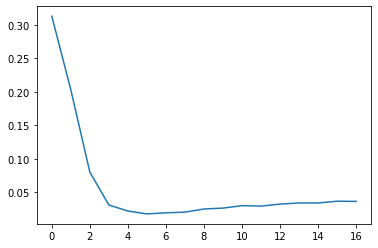

In [38]:
plt.plot(error_rates)

In [42]:
param_grid = {"max_depth":range(1,18), 
"max_features":[0.2, 0.4, 0.6, 0.8]}
clf = DecisionTreeClassifier()
gridsearch_clf = GridSearchCV(clf, param_grid, cv=8)
gridsearch_clf.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 18),
                         'max_features': [0.2, 0.4, 0.6, 0.8]})

In [45]:
gridsearch_clf.best_params_

{'max_depth': 6, 'max_features': 0.8}

In [53]:
scores = []
for i in range(1,18):
    clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(X_train, y_train)
    scores.append(1 - np.mean(cross_val_score(clf, X_train, y_train, scoring="accuracy", cv = 8)))

In [55]:
np.argmin(scores)

5

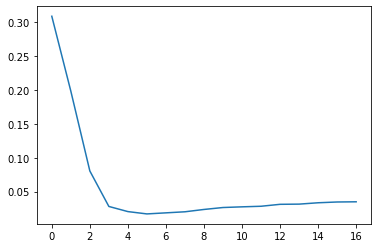

In [56]:
plt.plot(scores)

In [84]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
scores=validation_curve(clf, X_train, y_train,param_name="max_depth",param_range=range(1,18) ,scoring="accuracy", cv = 8)
train_scores = np.mean(scores[0], axis = 1)
validation_scores = np.mean(scores[1], axis = 1)

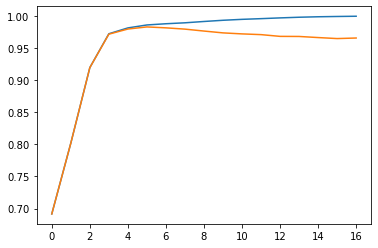

In [87]:
plt.plot(train_scores)
plt.plot(validation_scores)
plt.show()

In [126]:
titanic = sns.load_dataset('titanic')
titanic.drop(["deck", "alive"],axis = 1 ,inplace = True)
titanic.dropna(inplace=True)
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [127]:
scaler = MinMaxScaler()
titanic[["age", "fare"]] = scaler.fit_transform(titanic[["age", "fare"]])

In [128]:
titanic = pd.get_dummies(titanic, columns = ["pclass","sex","embarked","class","who","embark_town"])

In [167]:
X = titanic.drop(axis = 1, columns = "survived")
y = titanic["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(498, 23) (214, 23) (498,) (214,)


In [168]:
clf = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [163]:
param_grid = {"max_depth":range(1,18), 
"max_features":[0.2, 0.4, 0.6, 0.8]}

clf = DecisionTreeClassifier()
rf = RandomForestClassifier()
gridsearch_clf = GridSearchCV(clf, param_grid, cv=8)
gridsearch_rf = GridSearchCV(rf, param_grid, cv=8)
gridsearch_clf.fit(X_train, y_train)
gridsearch_rf.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 18),
                         'max_features': [0.2, 0.4, 0.6, 0.8]})

In [164]:
gridsearch_clf.best_params_

{'max_depth': 6, 'max_features': 0.8}

In [165]:
gridsearch_rf.best_params_

{'max_depth': 7, 'max_features': 0.4}

In [197]:
clf = DecisionTreeClassifier(max_depth=6, max_features= 0.8)
rf = RandomForestClassifier(max_depth=7, max_features= 0.4)

clf.fit(X_train, y_train)
rf.fit(X_train, y_train)
clf_y_train_pred = clf.predict(X_train)
rf_y_train_pred = rf.predict(X_train)
clf_y_test_pred = clf.predict(X_test)
rf_y_test_pred = rf.predict(X_test)

print(f"Decision Tree: {accuracy_score(clf_y_test_pred,y_test)}, Random Forest: {accuracy_score(rf_y_test_pred,y_test)}")

Decision Tree: 0.8130841121495327, Random Forest: 0.8317757009345794
